In [1]:
library(edgeR)

options(warn=-1)
#The root directory
dir="../counts"
setwd(dir)

Loading required package: limma



### A tiny normalization tutorial :-) 

#### For example Bovine

In [2]:
Data = read.table("bos_taurus_linear_counts.tsv", header=T, sep="\t")

In [3]:
Counts = round(data.frame(Data[,-1], row.names = Data[,1]))
pseudoCounts <- log2(Counts+1)

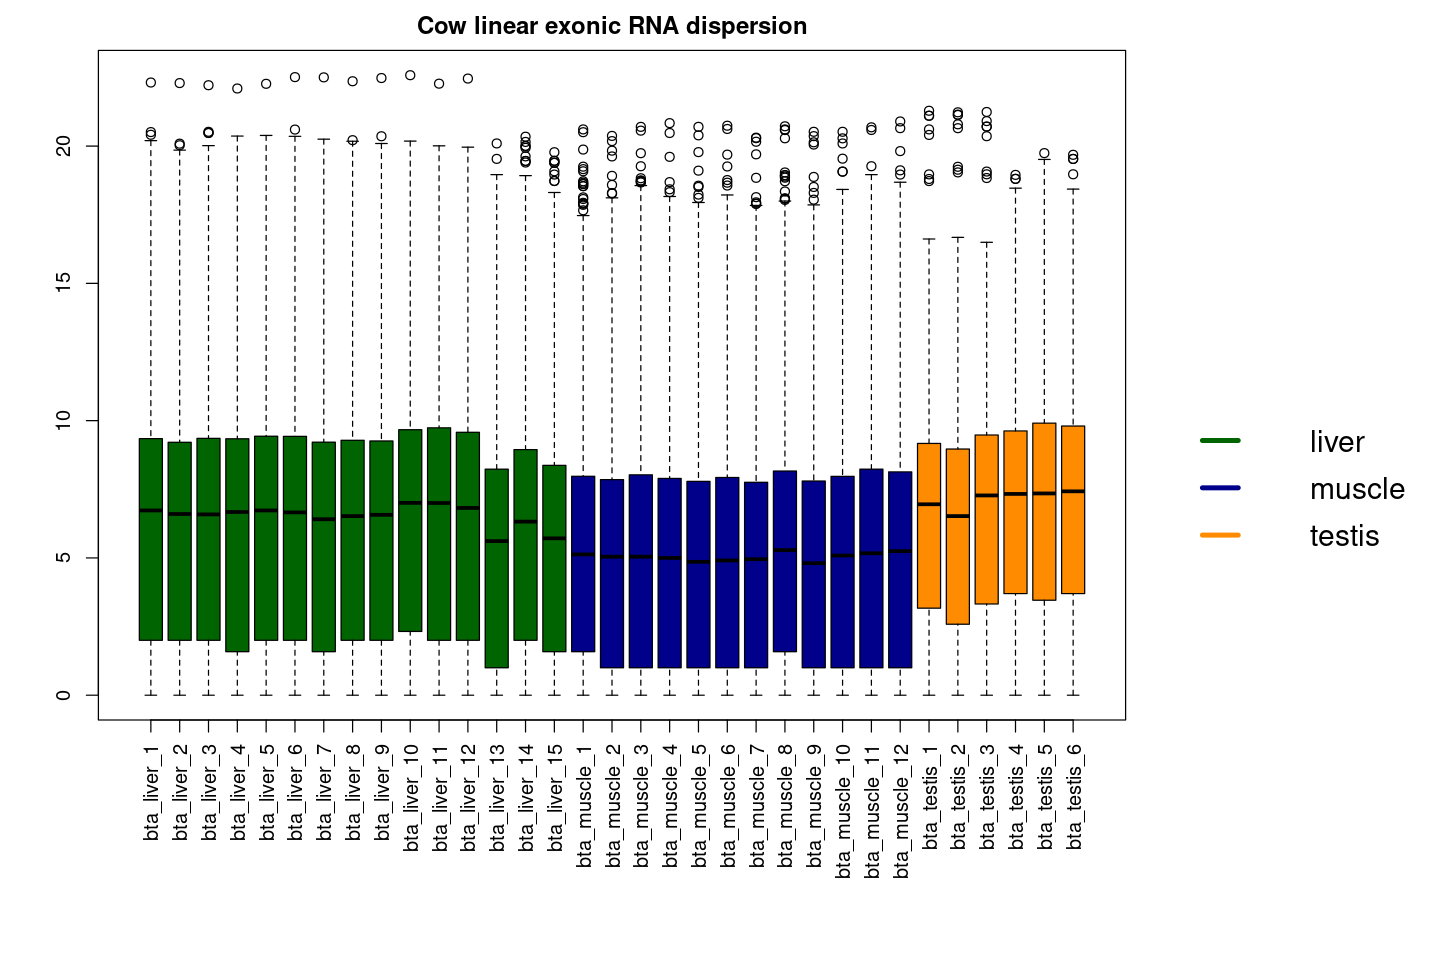

In [4]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoCounts, col=colors, las=3, main="Cow linear exonic RNA dispersion")
par(xpd=TRUE)
legend(35, 11, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

#### Normalization

In [5]:
dgeCounts <- DGEList(Counts)

# We normalize the data in order to take into account the different overall number of reads between samples
dgeCounts <- calcNormFactors(dgeCounts, method="TMM")
eff.lib.size <- dgeCounts$samples$lib.size*dgeCounts$samples$norm.factors
normCounts <- sweep(dgeCounts$counts, 2, eff.lib.size, "/")*10^6

# which is equivalent to normCounts <- cpm(dgeFull)
pseudoNormCounts <- log2(normCounts + 1)

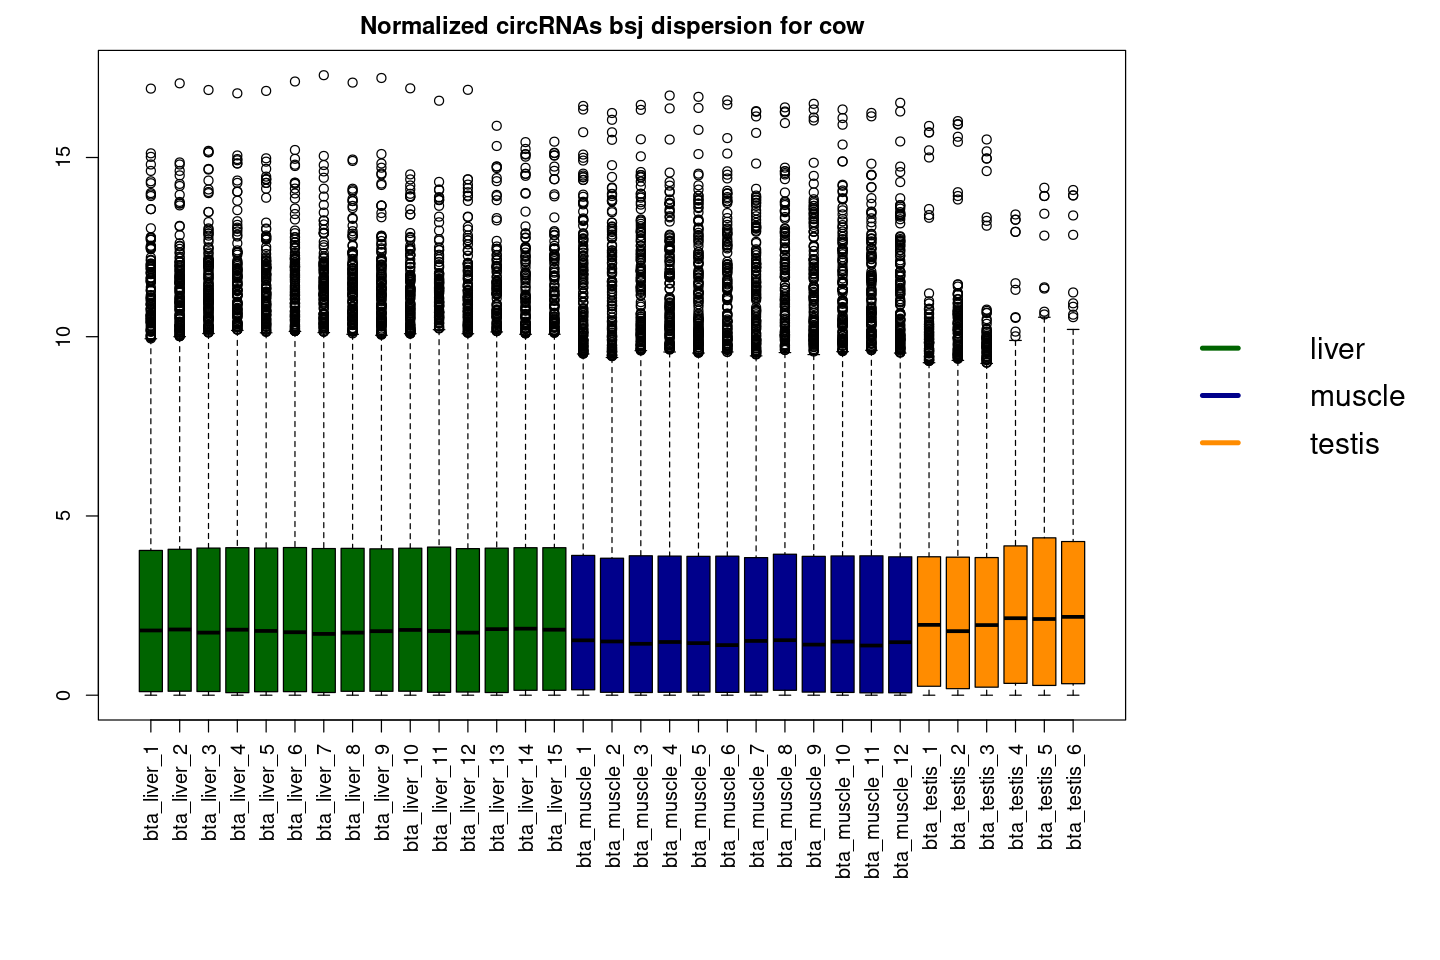

In [6]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoNormCounts, col=colors, las=3, main="Normalized circRNAs bsj dispersion for cow")
par(xpd=TRUE)
legend(35, 11, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)